In [1]:
#import libraries
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
#sympy solution
from sympy.utilities.lambdify import lambdify

init_printing()

x=sympy.symbols('x')
y=sympy.cos(x)**2*sympy.sin(x)**3/(4*x**5*sympy.exp(x))

yprime=sympy.diff(y)
yprime

yprime_lamb = lambdify((x), yprime)
yprime_lamb(2.2)

NameError: name 'init_printing' is not defined

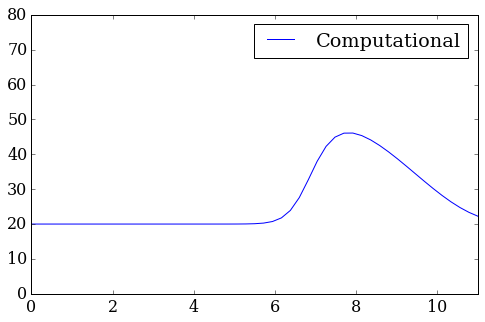

In [5]:
#Traffic equation solution

#Units are km and hours
Vmax = 136
L = 11
pmax = 250
nx = 51
dt = 0.001
T=0.05
nt=int(T/dt)
dx=L/nx


#Initial conditions (Used in part B of the assignement)

x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*20 
rho0[10:20] = 50


u=rho0.copy()

#solve numerically the equation
for n in range (nt):
    un= u.copy()
    u[1:]=un[1:]- dt/dx*Vmax*(1- 2*un[1:]/pmax)*(un[1:]-un[0:-1])
    u[0] = 20
        
#Let's plot the solution because we like graphs
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x,u, label='Computational')
pyplot.xlim([0,11])
pyplot.ylim([0,80])
pyplot.legend();



#Numerical information for homework
#Find the biggest rho
rho_mx = u[0]
for i in range (0, len(u)-1):
    if rho_mx<u[i]:
        rho_mx = u[i]

#V is a min when rho is a max
V_min = Vmax*(1-rho_mx/pmax)/3.6
V_min

#finding average speed
V_sum = 0
for i in range(0, len(u)-1):
    V_sum = V_sum + Vmax*(1-u[i]/pmax)/3.6
V_av = V_sum/(len(u)-1)

In [6]:
V_av

33.752455267069401

In [7]:
V_min

30.812535464361666